# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Строим прогноз, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Построим модель с предельно большим значением *F1*-меры. Нужно довести метрику до 0.59. Проверим *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйем *AUC-ROC*, сравниваем её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# 1. Подготовка данных

In [2]:
import pandas as pd

In [4]:
# Открываем датасет

path = r"C:\Users\Asus\Documents\Python Scripts\github praktikum\06 Обучение с учителем"
data = pd.read_csv(path+'/ML_supervised.csv')

# Вывод первых 5 строка
data.head().T

,0,1,2,3,4
RowNumber,1,2,3,4,5
CustomerId,15634602,15647311,15619304,15701354,15737888
Surname,Hargrave,Hill,Onio,Boni,Mitchell
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0,83807.9,159661,0,125511
NumOfProducts,1,1,3,2,1


In [5]:
# Выводим информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
# Выявляем NaN значение
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [7]:
# Рассмотрим строка со значением NaN
data_nan = data[data['Tenure'].isna()]

data_nan

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


### Вывод 

По сколько строки со значениями NaN около 10% от обшего количества наблюдений, нецелесообразно их удаления. Заменяем значение NaN на медиану.

In [8]:
#Замена NaN значение на медиану
df = data.fillna(data['Tenure'].median())
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# Рассмотрение наличия дубликатов
df.duplicated().sum()

0

In [10]:
# Удаление столбцы RowNumber, CostumerID и Surname 

df_ok =  df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

<font color="green"> В этот проект не рассматриваются модели с категориальныит признаками</font>

In [11]:
# Импорт функции масштавиробания
from sklearn.preprocessing import StandardScaler

# Группа столбцов со значениями сильно отилчаюшихса от 1.
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Масштавирование значений в датафреиме
scaler = StandardScaler()
scaler.fit(df[numeric])
df_ok[numeric] = scaler.transform(df_ok[numeric])


In [12]:
# Кодирование категориальных наблюдений 
df_ohe = pd.get_dummies(df_ok, drop_first = True)

df_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.086246,-1.225848,1,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,-1.448581,0.117350,1,0,1,0.216534,0,0,1,0
2,-1.536794,0.293517,1.087768,1.333053,3,1,0,0.240687,1,0,0,0
3,0.501521,0.007457,-1.448581,-1.225848,2,0,0,-0.108918,0,0,0,0
4,2.063884,0.388871,-1.086246,0.785728,1,1,1,-0.365276,0,0,1,0


 ### Вывод
 
 Возникает гипотезу о том что признаки RowNumber, CustomerID и Surname негативно вляют на модель предсказание поскольку эти признаки либо назначеные либо абсолютно случаинные. Поэтому создадим два датафрейима чтобы проверить гипотезу. 
 
 <font color="green"> Данную гипотезу не проверяем на этом проекте.

In [13]:
from sklearn.model_selection import train_test_split



# Назначение признаков 
features = df_ohe.drop(['Exited'], axis = 1)
target = df_ohe['Exited']


In [14]:
# Определяем функцию для того чтобы разделить датасет на 3 части : обущающий, валидацилный и тестовый

def train_test_validate_split(features, targets, test_size=0.2, validate_size=0.1):
    # Делим на обучующую и тестовую часть
    features_train, features_test, target_train, target_test = train_test_split(
        features,
        targets,
        stratify=targets,
        test_size=test_size
    )
    # Воторой раз делим датачет
    post_split_validate_size = validate_size / (1 - test_size)
    features_train, features_valid, target_train, target_valid = train_test_split(
        features_train,
        target_train,
        stratify=target_train,
        test_size=post_split_validate_size
    )
    return features_train, features_test, features_valid, target_train, target_test, target_valid

In [15]:
# Применение функций деления датасета на 3 части 
features_train, features_test, features_valid, target_train, target_test, target_valid =(
    train_test_validate_split(features, target) )


In [16]:
#Именование стольбцов для далнейщего обработка в цикле

features_train.name = 'features_train'
features_test.name = 'features_test'
features_valid.name = 'features_valid'
target_train.name = 'target_train'
target_test.name = 'target_test'
target_valid.name = 'target_valid'

In [17]:
# Проверка длины датасетов 

for data in (features_train, features_test, features_valid, target_train, target_test, target_valid ):
    print('Длина датафрэйма', data.name  ,':', data.shape)

Длина датафрэйма features_train : (7000, 11)
Длина датафрэйма features_test : (2000, 11)
Длина датафрэйма features_valid : (1000, 11)
Длина датафрэйма target_train : (7000,)
Длина датафрэйма target_test : (2000,)
Длина датафрэйма target_valid : (1000,)


# 2. Исследование задачи

In [18]:
# Импорт библиотеки 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import  matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [19]:

# Определяем функцию которая расчитивает точности при разнных глубин деоева
def search_hyperparameter (modelML, low, high, step):
    train = []
    valid = []
    f1 = []
    
    for hyperp in range(low, high, step):
        model = modelML(random_state = 12345 ,  max_depth = hyperp)
        model.fit(features_train, target_train)
    
        predict_train = model.predict(features_train)
        accuracy_train = accuracy_score(target_train, predict_train)
        train.append(accuracy_train)
    
        prediction_valid = model.predict(features_valid)
        accuracy_valid = accuracy_score(target_valid, prediction_valid)
        valid.append(accuracy_valid)
        
        f1_value = f1_score(target_valid, prediction_valid)
        f1.append(f1_value)
        
    results= pd.DataFrame( [train, valid, f1],
                           columns = range(low,high,step)).T.reset_index()                        
                           
    results.columns = ['parametr','accuracy train','accuracy valid', 'f1 score']
    
    return results

    

In [20]:
# Применяем функцию перебора гиперпараметра для рещаюшего дерево классификатора
dtc = search_hyperparameter(DecisionTreeClassifier, 1, 21, 1)

print(dtc)

    parametr  accuracy train  accuracy valid  f1 score
0          1        0.796286           0.796  0.000000
1          2        0.826714           0.831  0.534435
2          3        0.838857           0.842  0.401515
3          4        0.846571           0.848  0.437037
4          5        0.857571           0.863  0.605187
5          6        0.861286           0.851  0.517799
6          7        0.871143           0.853  0.544892
7          8        0.880143           0.839  0.525074
8          9        0.892714           0.838  0.529070
9         10        0.904000           0.840  0.537572
10        11        0.917286           0.836  0.546961
11        12        0.934714           0.829  0.531507
12        13        0.952857           0.824  0.526882
13        14        0.970286           0.817  0.517150
14        15        0.984143           0.812  0.522843
15        16        0.992429           0.805  0.508816
16        17        0.996143           0.791  0.470886
17        

In [21]:
# Определение функций построения графика accuracy и f1_score для датасетов с категориальными и без ктегориалных признаков дла дерево класификатора.

def plot_results (data, low, high, title):
    x = data['parametr']
    y = data['accuracy train']
    z = data['accuracy valid']
    k = data['f1 score']
    plt.figure(figsize=(15,5))
    plt.xlim(low,high)
    plt.ylim(data['f1 score'].min(),1)
    plt.xlabel('Hyperparametr')
    plt.ylabel('Accuracy, F1_score')
    plt.plot(x, y , color='blue', label = 'Accuracy train')
    plt.plot(x,z,  color = 'green', label = 'Accuracy valid')
    plt.plot(x, k , color='y', label = 'F1 score')
    plt.grid()
    plt.legend()
    plt.title(title)
    plt.show()

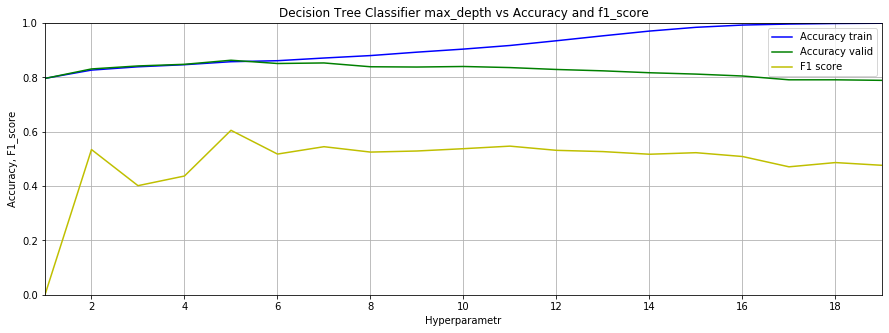

In [22]:
# Применение фукции построение графика при рещаюшим деревом.
plot_results(dtc, 1,19, 'Decision Tree Classifier max_depth vs Accuracy and f1_score')

### Вывод

При сравнении модель решаюшего дерево применены к датасетам с категориальныими признаками и без них, наблюдается что при увеличение глубины дерево кривые расходятся, то что связано с переобчением модели.
 
 При сравнении модель решаюшего дерево c увеличением глубины дерево значении accuracy расходятся что свидительствует о перелбучение модели. Оптималное значение глубины дерево max_depth = 6, что совпадает с найбольшем полученным значением f1 score = 0,569

In [23]:
# Применяем функцию перебора гиперпараметра для случйного леса
rfc = search_hyperparameter(RandomForestClassifier, 1, 41, 1)

rfc


,parametr,accuracy train,accuracy valid,f1 score
0,1,0.796286,0.796,0.000000
1,2,0.816857,0.814,0.205128
2,3,0.820286,0.816,0.213675
3,4,0.853429,0.847,0.447653
4,5,0.855000,0.851,0.473498
5,6,0.864714,0.852,0.506667
6,7,0.868857,0.855,0.536741
7,8,0.878571,0.862,0.557692
8,9,0.881143,0.859,0.555205
9,10,0.897143,0.857,0.546032


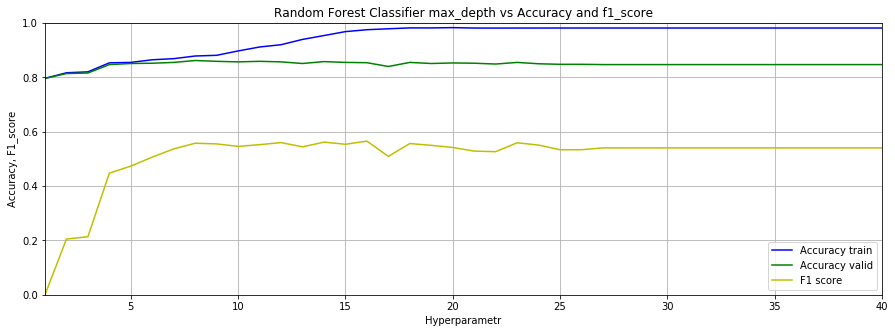

In [24]:
plot_results(rfc, 1,40, 'Random Forest Classifier max_depth vs Accuracy and f1_score')

### Вывод

При сравнении модель случайного дерево c увеличением глубины дерево значении accuracy расходятся что свидительствует о перелбучение модели. Оптималное значение глубины дерево max_depth = 8. После данного значения переобучения модели значительно наблюдается на расхождения крвых точности обучающей выборке и вылидационой выборке.

In [25]:
# Подбор гиперпараметра для логистической регресии
train_lr = []
valid_lr = []
f1_lr = []
    
for inter in range(1, 21, 1):
    model = LogisticRegression(random_state=12345, solver = 'liblinear' , max_iter = inter)
    model.fit(features_train, target_train)
    
    predict_train = model.predict(features_train)
    accuracy_train = accuracy_score(target_train, predict_train)
    train_lr.append(accuracy_train)
    
    prediction_valid = model.predict(features_valid)
    accuracy_valid = accuracy_score(target_valid, prediction_valid)
    valid_lr.append(accuracy_valid)
        
    f1_value = f1_score(target_valid, prediction_valid)
    f1_lr.append(f1_value)
        
lr= pd.DataFrame( [train_lr, valid_lr, f1_lr],
                           columns = range(1, 21 ,1)).T.reset_index()                        
                           
lr.columns = ['parametr','accuracy train','accuracy valid', 'f1 score']
    
lr


,parametr,accuracy train,accuracy valid,f1 score
0,1,0.790000,0.801,0.219608
1,2,0.809286,0.812,0.308824
2,3,0.810429,0.816,0.333333
3,4,0.810286,0.816,0.338129
4,5,0.810286,0.816,0.338129
5,6,0.810286,0.816,0.338129
6,7,0.810286,0.816,0.338129
7,8,0.810286,0.816,0.338129
8,9,0.810286,0.816,0.338129
9,10,0.810286,0.816,0.338129


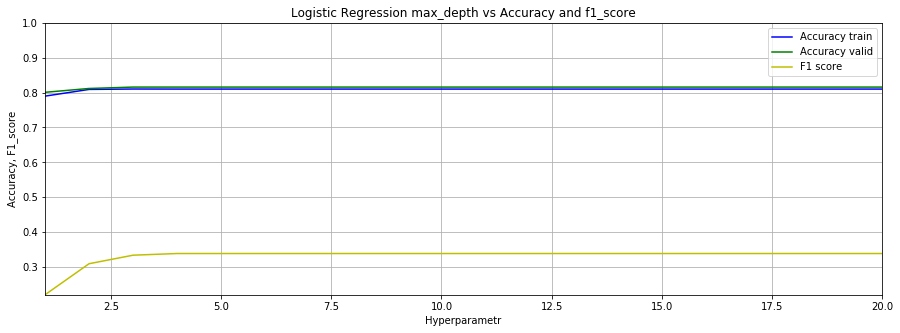

In [26]:
plot_results(lr, 1,20, 'Logistic Regression max_depth vs Accuracy and f1_score')

### Вывод

 Модель логистической регрессии рассчитал наименьшее значение f1 score. Оптимальное количество инерации 10. В дальнейшем не обрабативается данный моделю на тестовый датасет.

0    0.7963
1    0.2037
Name: Exited, dtype: float64


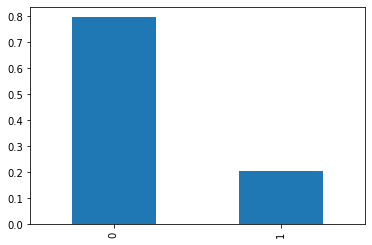

In [27]:
# Частота классов целового признака
class_frequency  =  df_ohe['Exited'].value_counts(normalize = True)
print(class_frequency)
class_frequency.plot(kind = 'bar')

### Вывод

Наблюдается дисбаланс классов исследуемыого датафрэйма.

0    0.858
1    0.142
dtype: float64
0.84


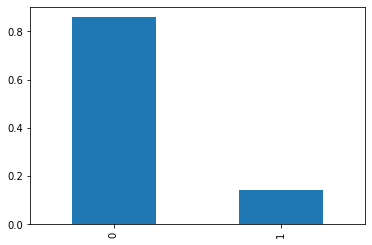

In [28]:
# Проверка модели рещающего дерево на адвекватность
optimal_dt =  DecisionTreeClassifier(max_depth = 10 ,  random_state = 12345)
optimal_dt.fit(features_train, target_train)

predict_valid_dt = pd.Series(optimal_dt.predict(features_valid))

class_frequency_dt = predict_valid_dt.value_counts(normalize = True)

print(class_frequency_dt)

class_frequency_dt.plot(kind = 'bar')

print(accuracy_score(target_valid, predict_valid_dt))

0    0.889
1    0.111
dtype: float64
0.857


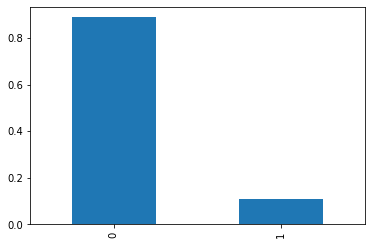

In [29]:
# Проверка модели случайного леса  на адвекватность
optimal_rf =  RandomForestClassifier(random_state=12345,  max_depth = 10)
optimal_rf.fit(features_train, target_train)

 
predict_valid_rf = pd.Series(optimal_rf.predict(features_valid))

class_frequency_rf = predict_valid_rf.value_counts(normalize = True) 

print(class_frequency_rf)

class_frequency_rf.plot(kind = 'bar')

print(accuracy_score(target_valid, predict_valid_rf))

In [30]:
target_pred_constant = pd.Series([0]*len(target))

print(accuracy_score(target,target_pred_constant))

print(target_pred_constant)

0.7963
0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int64


### Вывод

При проверке на нулевой массив  значение точности меньше на 0,067 при логистической регресии а 0,047 при иодели классификатора дерево

# 3. Борьба с дисбалансом

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import shuffle

In [32]:
from sklearn.metrics import confusion_matrix

# Вывод матрица ошибок решаюшего дерево
confusion_matrix_dt= confusion_matrix(target_valid, predict_valid_dt)

confusion_matrix_dt


array([[747,  49],
       [111,  93]], dtype=int64)

In [33]:
# Вывод полноты  решаюшего дерево
recall_dt = recall_score(target_valid, predict_valid_dt)

recall_dt

0.45588235294117646

In [34]:
# Вывод точности решаюшего дерево
precision_dt = precision_score(target_valid,predict_valid_dt)

precision_dt

0.6549295774647887

In [35]:
# Вывод метрики f1 # Вывод точности 
f1_dt = f1_score(target_valid,predict_valid_dt)

f1_dt

0.5375722543352601

In [36]:
# Вывод матрица ошибок случайного леса
confusion_matrix_rf= confusion_matrix(target_valid, predict_valid_rf)

confusion_matrix_rf

array([[771,  25],
       [118,  86]], dtype=int64)

In [37]:
# Вывод полноты случайного леса
recall_rf = recall_score(target_valid, predict_valid_rf)

recall_rf

0.4215686274509804

In [38]:
# Вывод точности случайного леса
precision_rf = precision_score(target_valid,predict_valid_rf)

precision_rf

0.7747747747747747

In [39]:
# Вывод метрики f1 случайного леса
f1_rf = f1_score(target_valid,predict_valid_rf)

f1_rf

0.5460317460317461

In [40]:
# Обучение модели решаюшего дерево при сбаланстрованном весе классов.

model_balanced_dt = DecisionTreeClassifier(random_state=12345, max_depth = 6 ,class_weight = 'balanced')
model_balanced_dt.fit(features_train, target_train)
predicted_valid_balanced_dt = model_balanced_dt.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid_balanced_dt))
print('Accuracy:' ,accuracy_score(target_valid, predicted_valid_balanced_dt))

F1: 0.5898778359511343
Accuracy: 0.765


In [41]:
# Обучение модели случайного леса при сбаланстрованном весе классов.

model_balanced_RFC = RandomForestClassifier(random_state=12345,  n_estimators= 100, max_depth = 10,class_weight = 'balanced')
model_balanced_RFC.fit(features_train, target_train)
predicted_valid_balanced_RFC = model_balanced_RFC.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid_balanced_RFC))
print('Accuracy:' ,accuracy_score(target_valid, predicted_valid_balanced_RFC))

F1: 0.6374695863746959
Accuracy: 0.851


### Вывод

При модели случайного леса с гиперпараметрами n_estimators = 30 и max_depth = 10, получаем значение 0,63 что превышает минимальное значение заданное.

In [42]:
# Функция для увеличение выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [43]:
#Применение функции увеличения выборки к датафрейму без категориальными признаками
features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

# Обучение модели случайного леса с увеличеной выборкойю
model_upsampled_rf = RandomForestClassifier(random_state=12345, n_estimators= 100, max_depth =10 , class_weight = 'balanced'
                                         )
model_upsampled_rf.fit( features_upsampled, target_upsampled)
predicted_valid_upsampled_rf = model_upsampled_rf.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid_upsampled_rf))

F1: 0.62882096069869


In [44]:
# Обучение модели  решаюшего дерево с увеличеной выборкой

model_upsampled_dt = DecisionTreeClassifier(random_state=12345, max_depth = 6 ,class_weight = 'balanced')
model_upsampled_dt.fit( features_upsampled, target_upsampled)
predicted_valid_upsampled_dt = model_upsampled_dt.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid_upsampled_dt))

F1: 0.5898778359511343


In [45]:
# Функция для уменьшения выборки 
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled



In [46]:
# Применение функций уменьшения вывборки к датафрэйму без категориальных прризнаков
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

# Обучение модели случайного леса при уменьшеной выборке
model_downsampled_rf = RandomForestClassifier(random_state=12345, n_estimators= 100, max_depth = 10, class_weight = 'balanced'
                                         )
                                         
model_downsampled_rf.fit(features_downsampled, target_downsampled)

predicted_valid_downsampled_rf = model_downsampled_rf.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid_downsampled_rf))

F1: 0.5266187050359713


In [47]:
# Обучение модели решающего дерево при уменьшеной выборке
model_downsampled_dt = DecisionTreeClassifier(random_state=12345, max_depth = 6 ,class_weight = 'balanced')
                                         
model_downsampled_dt.fit(features_downsampled, target_downsampled)

predicted_valid_downsampled_dt = model_downsampled_dt.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid_downsampled_dt))

F1: 0.5428109854604201


### Вывод

Из результатов по борьбе дисбаланса классов следует что найбольше значения метрики f1 получили при применения всвешивания классов balanced. 

f1 = 0.616 что больше чем заданное по проекту 0,59

# 4. Тестирование модели

0    0.7795
1    0.2205
dtype: float64
0.842
0.6273584905660378


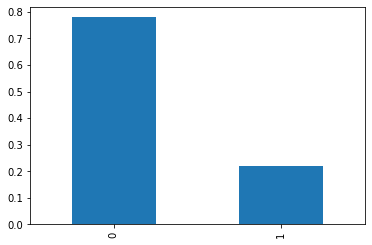

In [48]:
# Тестируем модель случайого леса на выборке тест
model_balanced_RFC =  RandomForestClassifier(random_state=12345, n_estimators= 100, max_depth = 10, class_weight = 'balanced')
model_balanced_RFC.fit(features_train, target_train)

# Спрогнозуремый модели значени
predicted_test = pd.Series(model_balanced_RFC.predict(features_test))

# Частота классов
class_frequency_model_balanced = predicted_test.value_counts(normalize = True) 


print(class_frequency_model_balanced)

class_frequency_model_balanced.plot(kind = 'bar')

# Значения метрики качество модели при выбоаной модели
print(accuracy_score(target_test, predicted_test))
print(f1_score(target_test, predicted_test))


In [49]:
# Нулевой массив 
target_pred_constant_test = pd.Series([0]*len(target_test))

print(accuracy_score(target_test, target_pred_constant_test))

len(target_pred_constant_test)


0.7965


2000

### Вывод

При тестовой выборке получили значения accuracy 0.604 , что высше чем  по задпнию

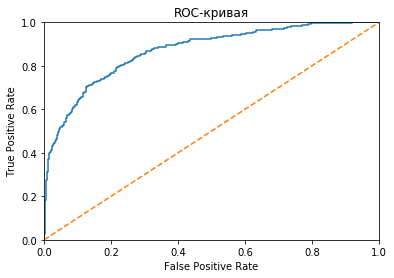

0.8691156487766657


In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Строение криво ROC
probabilities_test = model_balanced_RFC.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show()

auc_roc =  roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

### Вывод

Площадь под крривой бельше чем 0,5 то есть положителная, и кривая достаточно различается от случайного резултата, то что свидительствует о качество выбраной модели

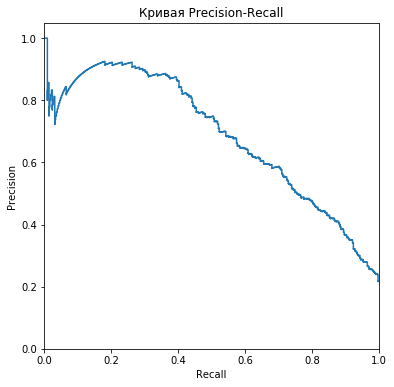

In [51]:
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression


precision, recall, thresholds = precision_recall_curve(target_test, probabilities_test[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show()

### Вывод

Кривая Точность-полнота показвает оптимистичная картина, то что может быть связано с маленким количеством наблюдений